## How does Multilayer Neural Network work?
Now let’s understand how a Neural Network is represented. A neural network consists of many **Nodes** (Neurons) grouped in **Layers**. Each layer can have any number of nodes and a neural network can have any number of layers. Let’s have a closer look at a couple of layers.

<center><img src="img/neural_network_1.png" alt="Neural Network Basic Layers" width="346" height="419" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 1.</b> Layers in a Neural Network</i></p>

Now as you can see, there are many interconnections between both the layers. These interconnections exist between **each node** in the first layer with **each and every node** in the second layer. These are also called the **weights** between two layers.

### Weights
Now let’s see how exactly these **weights** operate.
<center><img src="img/neural_network_2.png" alt="Neural Network Basic Layers" width="500" height="393" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 2.</b> How single neuron operates</i></p>

$$ H = x_1*w_1 + x_2*w_2 + x_3*w_3 + b $$
$$ Y = f(H) $$

Here we take the example of what’s going on with a **single node** in the network. Here we are considering all the values from the **previous layer** connecting to **one node in the next layer**.

* $Y$ is the **final output value** of the node.
* $w_i$ are the **weights** between the nodes in the previous layer and the output node.
* $x_i$ are the **values of the nodes** of the previous layer.
* $b$ is a **constant** bias. Bias is essentially a weight without an input term. It’s useful for having an **extra bit of adjustability** which is not dependant on previous layer.
* $H$ is the *intermediate node value*. This is not the final value of the node.
* $f( )$ is called an **Activation Function** and it is something we can choose. We will go through its importance later.

So finally, the output value of this node will be $f(0.57)$

Now let’s look at the calculations between two complete layers:

<center><img src="img/neural_network_3.png" alt="Calculations between Neural Network layers" width="500" height="583" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 3.</b> Calculations between two layers</i></p>

The weights in this case have been colour coded for easier understanding. We can represent the entire calculation as a matrix multiplication. If we represent the weights corresponding to each input node as vectors and arrange them horizontally, we can form a matrix, this is called the weight matrix. Now we can multiply the **weight matrix** with the input vector and then add the bias vector to get the intermediate node values.

<center><img src="img/neural_network_4.png" alt="Formula for calculating output values of a layer" width="500" height="481" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 4.</b> Formula for calculating output values of a layer</i></p>

We can summarize the entire calculation as $Y = f(w*x + b)$. Here, $Y$ is the output vector, $x$ is the input vector, $w$ represents the weight matrix between the two layers and $b$ is the bias vector.

We can determine the size of the weight matrix by looking at the number of input nodes and output nodes. An $m*n$ weight matrix means that it is between two layers with the first layer having $n$ nodes and the second layer having $m$ nodes.

### Hidden layers
Now let’s look at a complete neural network.


<center><img src="img/neural_network_5.png" alt="Formula for calculating the whole neural network" width="500" height="542" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 5.</b> Formula for calculating the whole neural network</i></p>

This is a small neural network of four layers. The input layer is where we feed our **external stimulus**, or basically the **data** from which our neural network has to **learn from**. The output layer is where we are supposed to get the target value, this represents what exactly our neural network is trying to **predict** or **learn**. All layers in between are called **hidden layers**. When we feed the inputs into the first layer, the values of the nodes will be calculated layer by layer using the matrix multiplications and activation functions till we get the final values at the output layer. That is how we get an output from a neural network.

So essentially a neural network is, simply put, a series of matrix multiplications and activation functions. When we input a vector containing the input data, the data is multiplied with the sequence of weight matrices and subjected to activation functions untill it reaches the output layer, which contains the **predictions** of the neural network corresponding to that particular input.

## Implementation

Now let's implement a basic multilayer perceptron (neural network). For the sake of the example we will be generating **random weights** for each layer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NeuralNetwork:
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        # Initialize weights and biases
        # NB: Remember, the weight matrix size is m x n, where m is the number of output nodes and n is the number of input nodes
        weight_matrix_1 = np.random.randn(hidden_size, input_size) # Weight matrix between input and hidden layer
        weight_matrix_2 = np.random.randn(output_size, hidden_size) # Weight matrix between hidden and output layer

        self.weights = [weight_matrix_1, weight_matrix_2]
        self.biases = [np.zeros(hidden_size), np.zeros(output_size)]

    def sigmoid(self, x: np.ndarray) -> np.ndarray: # Activation function (there are many other activation functions)
        return 1 / (1 + np.exp(-x))

    def forward(self, x: np.ndarray) -> list[np.ndarray]:
        activations = [x]           # List to store activations for each layer. Keep the first input X too.
        current_activation = x      # Current activation value (the first time it is simply the input X)
        # Propagate through each layer
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, current_activation) + b   # Apply the layer's weights and bias
            current_activation = self.sigmoid(z)    # Apply activation function and get the layer's output
            activations.append(current_activation)

        return activations

We can invoke the neural network (remember, we use random weights) and see how our input data of three numbers $(1,2,3)$ is converted into a final output after passing through all the layers.

In [3]:
network = NeuralNetwork(3, 4, 2)  # 3 input nodes, 4 hidden nodes, 2 output nodes
input_data = np.array([1, 2, 3])
final_layer = network.forward(input_data)[-1]  # Get final layer output

print(final_layer)

[0.51708171 0.1239638 ]


## Role of activation function
Even though our neural network has a very complex configuration of weights, it will not be able to solve a problem without the activation function. The reason for this lies in the concept of **Non-Linearity**.

Let’s revise what linearity and non-linearity means.

$$ y = w_1 * x_1 + w_2 * x_2 $$

The above equation represents a **linear relationship** between $y$ and $x_1$, $x_2$. Regardless of what values $w_1$ and $w_2$ have, at the end of the day the change of value of $x_1$ and $x_2$ will result in a linear change in $y$. Now if we look at real world data we realize this is actually not desirable because data often has non-linear relationships between the input and output variables.


<center><img src="img/activation_function_1.png" alt="Linearity vs non-linearity" width="500" height="409" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 6.</b> Linear relationship vs non-linear relationship</i></p>

The above diagram represents a typical dataset which shows a non-linear relationship between $x$ and $y$. If we try to fit a linear relationship on the data, we will end up with the **red line**, which is not a very accurate representation of the data. However if our relationship can be **non-linear**, we are able to get the green line, which is much better.

Now let’s compare the neural network equation **with and without the activation function**.

Without activation:
$$y = \sum_{i=0}^{n}(w_i * x_i) + b $$

With activation:
$$ y = f(\sum_{i=0}^{n}(w_i * x_i) + b) $$

We can observe that in this equation, there exists a **linear relationship** between the input and the output. However in the case of the equation with activation function, we can say that the relationship between input and output can be non-linear, IF the activation function itself is **non-linear**.

Hence all we have to do is keep some non-linear function as the activation function for each neuron and our neural network is now capable of fitting on non-linear data.

Let’s look at a couple of popular activation functions:


<center><img src="img/activation_function_2.png" alt="ReLU vs Sigmoid" width="500" height="283" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 7.</b> ReLU vs Sigmoid activation functions  </i></p>

### ReLU
ReLU stands for **Rectified Linear Unit**. It essentially becomes an identity function ($y = x$) when $x \geq 0$ and becomes $0$ when $x \lt 0$. This is a very widely used activation function because its a non-linear function and it is very simple.

### Sigmoid
Sigmoid is essentially a function bounded between $0$ and $1$. It will become $0$ for values which are very negative and $1$ for values which are very positive. Hence this function squishes values which are very high or very low to values between $0$ and $1$. This is useful in neural networks sometimes to ensure values aren’t extremely high or low. This function is usually used at the last layer when we need values which are binary ($0$ or $1$).

$$y=\frac{1}{1+e^{-x}}$$

### Tanh
Tanh function (hyperbolic tangent function), is a shifted version of the sigmoid, allowing it to stretch across the y-axis. It is defined as:
$$y=tanh(x) = \frac{2}{1+e^{-2x}}-1$$

Alternatively, it can be expressed using the sigmoid function:
$$y=tanh(x) = 2 \times sigmoid(2x) -1$$

**Tanh** outputs values from $-1$ to $+1$. It is commonly used in hidden layers due to its zero-centered output, facilitating easier learning for subsequent layers.

### Softmax
Softmax is an activation function commonly used in neural networks for multi-classification problems. Softmax is ideal for problems involving **more than two classes**, where the goal is to predict a single class out of many. The function's ability to generate a **probability distribution** over classes makes it particularly useful in classification models.

$$y=softmax(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{k} e^{z_j}}$$

### Non-linearity importance in NN

Neural networks consist of neurons that operate using **weights**, **biases**, and **activation functions**.

In the learning process, these weights and biases are updated based on the error produced at the output - a process known as **backpropagation**. Activation functions enable backpropagation by providing gradients that are essential for updating the weights and biases.

Without non-linearity, even deep networks would be limited to solving **only simple, linearly separable problems**. Activation functions empower neural networks to model highly complex data distributions and solve advanced deep learning tasks. Adding non-linear activation functions introduce flexibility and enable the network to learn more complex and abstract patterns from data.

## Neural Network Training 

Now that we have seen how a neural network is represented, we can go on to see how exactly it works. Since there are many layers having many neurons, there exists a complex set of weights to get an output from some input variables. Each weight in this network can be changed and hence there are countless configurations a neural network can have.

A **trained** neural network has weights configuration which accurately predicts correct outputs for some input data. And that is what we ultimately hope to achieve. We will now go through how exactly a neural network trains itself to get this desirable weight configuration.

### Backpropagation
Backpropagation is the name of the algorithm a neural network uses to train itself. This revolutionary algorithm is a mixture of the **chain rule in derivation** and **gradient descent**, the common optimization algorithm used in linear and logistic regression.

To understand how backpropagation works, first we have to understand the relationship between the output and the weights in between. It is clear that every weight in the neural network will affect the output in some way due to the way the neural network is connected. Due to this fact, we can say that if I **change** a particular weight, the output will **change** in some way. We can also find the exact mathematical equation defining the relationship between each weight and the output.

<center><img src="img/backprop_1.png" alt="Dataset with three input features" width="500" height="233" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 8.</b> A dataset with three input features (X1, X2, and X3) </i></p>

Let’s say we are given a dataset with three input features, ($x_1$, $x_2$ and $x_3$) and we need to find the relationship between the input features and the output using a neural network. We will now see what exactly the neural network does.

#### Minimize the error

<center><img src="img/backprop_2.png" alt="error between the output and expected value" width="580" height="301" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 9.</b> Feed the neural network and measure the error between the output and expected value</i></p>

First step is to feed in the data and getting the output from the neural network. We shall call the output, `Y_pred`. Next we should compare the predicted value with the actual value. This value will be called the error. It is essentially how bad or how far off the model is from predicting the values correctly. Our goal is to now **minimize the error**.

Since `Y_pred` is a function of all the weights in the model and `Error` is a function of `Y_pred`, we can say that the `Error` will also depend on the weights. This means that we need to adjust our weights in such a way that the error is minimized. We do that using **partial derivatives**.

Let’s take a simple example of an equation, $y = w_1*x_1 + w_2*x_2$. If we find the partial derivative of $w_1$ or $w_2$ with respect to $y$, we can find out how $w_1$ or $w_2$ can affect $y$.

If the partial derivative of $w_1$ with respect to $y$ is **POSITIVE**, that means **DECREASING** the weight will **DECREASE** $y$.

If the partial derivative of $w_1$ with respect to $y$ is **NEGATIVE**, that means **INCREASING** the weight will **DECREASE** $y$.


<center><img src="img/backprop_3.png" alt="Derivatives measure the slope" width="500" height="294" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 10.</b> Derivatives measure the slope and in which direction to descent in order to change the output value</i></p>

These two rules are all we need to optimize the weights in the neural network. We need to find the **partial derivative of the error** with respect to every weight. If that partial derivative is **positive**, then we **decrease** the value of that weight so that error gets decreased. If that partial derivative is **negative**, then we **increase** that weight so that the error gets decreased. This is the basic underlying concept of how weights are updated after we calculate the error.

Since the last layer is the closest to the error, we will first derive the last layer with respect to the error and update those weights. Then we will move to the second last layer to do the same and so on and so forth. We repeat this process till we reach the first layer and all the weights are updated. This entire process is called **backpropagation**.

<center><img src="img/backprop_4.gif" alt="Backpropagation" width="640" height="480" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 11.</b> Backpropagation - Derive and update</i></p>

We perform backpropagation for a single row of data and update the weights. We then repeat for all the data available in the training data set, this entire cycle is called **one epoch**. Usually neural networks can take several epochs to train and it is up to us to decide how many epochs it will train for.

## Mathematical explanation

Let's say we have a neural network with 4 layers, each of them 1 neuron.

Let's name the output of each layer $a^{(L)}$, $a^{(L-1)}$, $a^{(L-2)}$, $a^{(L-3)}$

<center><img src="img/backprop_10.png" alt="Backpropagation Simple NN" width="500" height="154" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 12.</b> Simple network with 4 neurons</i></p>

The desired output $y$ is $1$.

So the cost of this simple network is:
$$ C_0 = (a^{(L)} - y)^2$$

where $C_0$ is the cost for single training example.

<center><img src="img/backprop_11.png" alt="Backpropagation Cost calculation" width="500" height="251" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 13.</b> Cost calculation</i></p>

The last ouput $a^{(L)}$ is calculated by next formula:
$$a^{(L)} = \sigma(w^{(L)} a^{(L-1)} + b^{(L)}) $$

where $\sigma$ is the activation function (e.g. *sigmoid* or *ReLU*)

For the sake of clarity let's name the input for the activation function $z$ :
$$z^{(L)} = w^{(L)} a^{(L-1)} + b^{(L)} $$

$$a^{(L)} = \sigma(z^{(L)}) $$

So, now we need to identify the importance of each weight $w$ to the cost. Because by modifying the weights we can modify (minimize) the cost. To do this we need to calculate the derivative of $w^{(L)}$ w.r.t $C_0$.

$$ \frac{dC_0}{dw^{(L)}}$$

Using the **Chain Rule** we directly come up with:


$$ \frac{dC_0}{dw^{(L)}} = \frac{dz^{(L)}}{dw^{(L)}} \frac{da^{(L)}}{dz^{(L)}} \frac{dC_0}{da^{(L)}}$$

This would give us the sensitivity of $C$ to small changes in $w^{(L)}$.

Now, let's calculate all the three derivatives, starting from the last one:

$$ \frac{dC_0}{da^{(L)}} = \frac{d(a^{(L)} - y)^2}{da^{(L)}} = 2(a^{(L)} - y) $$

The derivative of $a^{(L)}$ w.r.t $z^{(L)}$ is simply the derivative of the activation function:

$$ \frac{da^{(L)}}{dz^{(L)}} =  \frac{d\sigma(z^{(L)})}{dz^{(L)}} =   \sigma ' (z^{(L)}) $$

And the derivative of $z^{(L)}$ w.r.t $w^{(L)}$ comes up to be:

$$ \frac{dz^{(L)}}{dw^{(L)}} = \frac{d(w^{(L)} a^{(L-1)} + b^{(L)})}{dw^{(L)}} = a^{(L-1)} $$

So, finally the derivative of $C_0$ w.r.t to $w^{(L)}$ is:

$$  \boxed{\frac{dC_0}{dw^{(L)}} = a^{(L-1)} \sigma '(z^{(L)}) 2(a^{(L)} - y)}  $$

Since we have not a single, but many training examples, the derivative of the full cost function for all examples could simply be calculated as the average of all training examples:

$$ \frac{dC}{dw^{(L)}} = \frac{1}{m} \sum_{i=0}^{m-1}\frac{dC_i}{dw^{(L)}}$$

The sensitivity to the bias is almost identical:


$$ \frac{dC_0}{db^{(L)}} = \frac{dz^{(L)}}{db^{(L)}} \frac{da^{(L)}}{dz^{(L)}} \frac{dC_0}{da^{(L)}}$$

and evaluated to:


$$  \boxed{\frac{dC_0}{db^{(L)}} = 1 \sigma '(z^{(L)}) 2(a^{(L)} - y)}  $$

Now, we need to see how sensitive is the cost function the output $a^{(L-1)}$ of the previous layer:


$$ \frac{dC_0}{da^{(L-1)}} = \frac{dz^{(L)}}{da^{(L-1)}} \frac{da^{(L)}}{dz^{(L)}} \frac{dC_0}{da^{(L)}}$$

$$  \frac{dz^{(L)}}{da^{(L-1)}} = \frac{d(w^{(L)} a^{(L-1)} + b^{(L)})}{da^{(L-1)}} = w^{(L)}$$

So, this is evaluated to:

$$  \boxed{\frac{dC_0}{da^{(L-1)}} = w^{(L)} \sigma '(z^{(L)}) 2(a^{(L)} - y)}  $$

We can just keep iterating this same **chain rule** idea backwards to see how sensitive the cost function is to previous weights and biases.


<center><img src="img/backprop_12.png" alt="Backpropagation derivatives" width="295" height="538" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 14.</b> Backpropagation - Derive cost sensitivity to previous weights and biases</i></p>

## Implementation

We will implement a simple network with 3 layers:
 * Input layer with 2 nodes
 * Hidden layer with 2 nodes
 * Output layer with 1 node

The size of the dataset would be 33 rows with 2 features each (`years of experience` and `education level`) and 1 target value (`salary`).



<center><img src="img/backprop_13.png" alt="Backpropagation implementation network" width="485" height="284" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 22.</b> Backpropagation - Simple neural network for our salary data</i></p>

### Forward propagation
$$Z^{(1)} = W^{(1)} X + B^{(1)}$$
$$A^{(1)}1 = sigmoid(Z^{(1)})$$
$$Z^{(2)} = W^{(2)} A^{(1)} + B^{(2)}$$
$$A^{(2)} = sigmoid(Z^{(2)})$$


### Backward propagation
$$ Error = (A^{(2)} - Y) ^ 2$$
$$ dA^{(2)} = 2 (A^{(2)} - Y) $$
$$ dZ^{(2)} = sigmoid'(A^{(2)}) dA^{(2)} $$
$$ dW^{(2)} = \frac{1}{n} dZ^{(2)} \cdot A^{(1)^T} $$
$$ dB^{(2)} = \frac{1}{n} \sum dZ^{(2)} $$

$$ dA^{(1)} = W^{(2)^T} \cdot dZ^{(2)}  $$
$$ dZ^{(1)} = sigmoid'(A^{(1)}) dA^{(1)} $$
$$ dW^{(1)} = \frac{1}{n} dZ^{(1)} \cdot A^{(0)} $$

### Variables and its shapes
$$A^{(0)} = X : 33 \times 2 $$
$$Z^{(1)}, A^{(1)} : 2 \times 33 $$
$$Z^{(2)}, A^{(2)}, dA^{(2)}, dZ^{(2)}: 1 \times 33 $$
$$W^{(2)}, dW^{(2)}: 1 \times 2 $$
$$B^{(2)}, dB^{(2)}: 1 \times 1 $$

$$Z^{(1)}, A^{(1)}, dA^{(1)}, dZ^{(1)}: 2 \times 33 $$
$$W^{(1)}, dW^{(1)}: 2 \times 2 $$
$$B^{(1)}, dB^{(1)}: 2 \times 1 $$

In [4]:
# X1 = years of experience
X1 = [1.2, 1.3, 1.5, 1.8, 2, 2.1, 2.2, 2.5, 2.8, 2.9, 3.1, 3.3, 3.5, 3.8, 4, 4.1, 4.5, 4.9, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 10, 11, 12, 13, 14, 15]
# X2 = level of education
X2 = [2, 5, 3, 5, 3, 4, 2, 3, 4, 4, 3, 7, 5, 6, 5, 5, 2, 3, 4, 5, 6, 7, 5, 3, 2, 4, 5, 7, 3, 5, 7, 7, 5]
# Y = salary
Y = [2900, 3300, 3100, 4200, 3500, 3800, 3300, 3500, 3750, 4000, 3900, 5300, 4420, 5000, 4900, 5200, 3900, 4800, 5700, 6500, 6930, 7500, 7360, 6970, 6800, 7500, 8000, 9500, 11000, 9500, 12300, 13700, 12500]

# Pandas data frame works with vectorized arrays (33 arrays of 1 element each)
vectorized_X1 = np.array(X1).reshape(-1, 1)
vectorized_X2 = np.array(X2).reshape(-1, 1)
Y_train = np.array(Y).reshape(-1, 1) / 20000  # We divide by 20000 to scale down the output (it must be between 0 and 1)

# Pack the train set
X_train = np.concatenate([vectorized_X1, vectorized_X2], axis=1)

In [5]:
class NeuralNetwork:
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        # Initialize weights and biases using random numbers
        self.weights = [np.random.randn(hidden_size, input_size), np.random.randn(output_size, hidden_size)]
        self.biases = [np.zeros((hidden_size, 1)), np.zeros((output_size, 1))]

    def sigmoid(self, X: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-X))

    def sigmoid_derivative(self, X: np.ndarray) -> np.ndarray:
        return X * (1 - X)

    def forward(self, X: np.ndarray, print_values: bool = False) -> list[np.ndarray]:
        z1 = self.weights[0] @ X.T + self.biases[0]
        a1 = self.sigmoid(z1)

        z2 = self.weights[1] @ a1 + self.biases[1]
        a2 = self.sigmoid(z2)

        return [z1, z2], [a1, a2]

    def backward(self, X: np.ndarray, Y: np.ndarray, a: list[np.ndarray]):
        a1 = a[0]
        a2 = a[1]

        # Calculate the error
        error = (a2 - Y.T) ** 2
        n = len(Y)

        dc_da2 = 2 * (a2 - Y.T)                             # Derivative of the error w.r.t. the activation
        dc_dz2 = self.sigmoid_derivative(a2) * dc_da2       # Derivative of the error w.r.t. the delta of the output layer
        dc_dw2 = np.dot(dc_dz2, a1.T) / n                   # Derivative of the error w.r.t. the weights of the output layer
        dc_db2 = np.sum(dc_dz2, axis=1, keepdims=True) / n  # Derivative of the error w.r.t. the biases of the output layer

        dc_da1 = self.weights[1].T @ dc_dz2                 # Derivative of the error w.r.t. the activation of the hidden layer
        dc_dz1 = self.sigmoid_derivative(a1) * dc_da1       # Derivative of the error w.r.t. the delta of the hidden layer
        dc_dw1 = np.dot(dc_dz1, X) / n                      # Derivative of the error w.r.t. the weights of the hidden layer
        dc_db1 = np.sum(dc_dz1, axis=1, keepdims=True) / n  # Derivative of the error w.r.t. the biases of the hidden layer

        return dc_dw1, dc_dw2, dc_db1, dc_db2, error

    def update_weights_and_biases(self, dc_dw1: np.ndarray, dc_dw2: np.ndarray, dc_db1: np.ndarray, dc_db2: np.ndarray, learning_rate: float):
        self.weights[0] -= learning_rate * dc_dw1
        self.weights[1] -= learning_rate * dc_dw2
        self.biases[0] -= learning_rate * dc_db1
        self.biases[1] -= learning_rate * dc_db2
    
    def train(self, X: np.ndarray, Y: np.ndarray, learning_rate: float, epochs: int):
        losses = []
        for epoch in range(epochs):
            z, a = self.forward(X)

            dc_dw1, dc_dw2, dc_db1, dc_db2, error = self.backward(X, Y, a)
            losses.append(np.sum(error))

            # Update the weights and biases
            self.update_weights_and_biases(dc_dw1, dc_dw2, dc_db1, dc_db2, learning_rate)

            if epoch % 1000 == 0:
                print(f"Epoch {epoch} error: {round(np.sum(error), 3)}")
        return losses

Epoch 0 error: 2.573
Epoch 1000 error: 0.06
Epoch 2000 error: 0.025
Epoch 3000 error: 0.022
Epoch 4000 error: 0.021


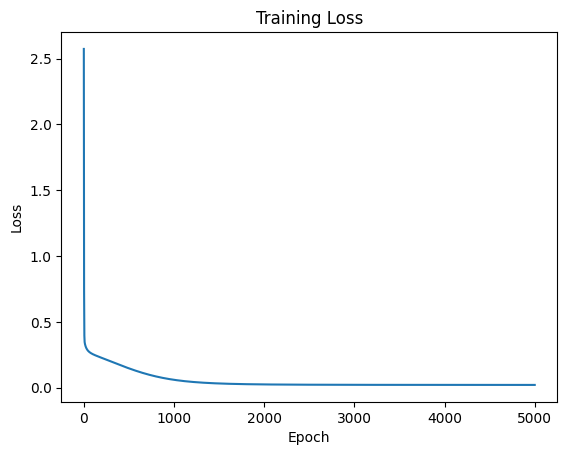

In [6]:
network = NeuralNetwork(2, 2, 1)  # 2 input nodes, 2 hidden nodes, 1 output node
learning_rate = 0.5
epochs = 5000
losses = network.train(X_train, Y_train, learning_rate, epochs)

# Plot training loss
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

A network with 2 neurons in the hidden layer and 1 neuron in the output layer was constructed. The network was trained for `5000` epochs with a learning rate of `0.5`. These parameters were found with a little trial and error.

Running the example prints the accumulated prediction error. Obviously, the backpropagation works and minimze the error with each epoch going down to `0.021`, which is not bad at all.